1)Prediciting the right fare amount appropriate for customers and taxi drivers-

# Context

The challenges faced by taxi operators in quoting the right fare to customers 
before starting the trip and The same 
issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for 
this, we have a historical dataset to analyse that includes records of taxi trip details and fares of those trips.

# The Analysis -


### 1) Importing libraries and understanding the dataset :

In [230]:
#importing the required libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [231]:
#using pandas to read the dataset-

taxi = pd.read_csv('taxi.csv')

In [232]:
#first five rows of the dataset-

taxi.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [233]:
# shape of dataset-

taxi.shape

(35000, 20)

Inference-

The dataset hass 35000 rows and 20 columns.

In [234]:
# information regarding dataset-

taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  int64  
 12  dropoff_location_id      35000 non-null  int64  
 13  year                     35000 non-null  int64  
 14  month                 

Inference-

The dataset has datatype: 

10 columns of float type

9 columns integer type

1 columns object type.

The entries-35000

In [235]:
# describing numerical columns-

taxi.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,1.110086,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,152.543943,146.852200,2018.0,6.132429,15.337743,2.885200,13.803657,2257.38360,41.324249
std,4.496854,0.581456,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,59.764598,76.373292,0.0,3.342088,8.691250,1.926999,6.224485,5112.41526,19.167043
min,0.010000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.00000,0.310000
25%,6.470000,1.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1448.00000,30.300000
50%,8.700000,1.000000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1862.00000,38.460000
75%,10.990000,1.000000,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,186.000000,229.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2340.00000,48.200000
max,79.010000,5.000000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,265.000000,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,86347.00000,468.350000


Inference-

trip_distance, rate_code, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, imp_surcharge, total_amount, pickup_location_id, dropoff_location_id, year, month, day, day_of_week, hour_of_day, trip_duration, calculated_total_amount are the numerical columns described above along with their mean,min and max.

In [236]:
# rounding up certain columns to get better understanding-

taxi[['trip_distance','tip_amount','tolls_amount','fare_amount']] = round(taxi[['trip_distance','tip_amount','tolls_amount','fare_amount']])

## 2) Cleaning the dataset :


### a) Checking null values if present-

In [237]:
# The null values in the dataset-

taxi.isnull().sum()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

Inference-

There are no null values present in the dataset.

In [238]:
# The duplicate values in the dataset-

taxi.duplicated().sum()

0

Inference-

There are no duplicate values present in the dataset.

In [239]:
# The distinct values from each column-

taxi.nunique()

trip_distance                59
rate_code                     5
store_and_fwd_flag            2
payment_type                  4
fare_amount                 171
extra                         7
mta_tax                       2
tip_amount                   59
tolls_amount                 35
imp_surcharge                 2
total_amount               2692
pickup_location_id          216
dropoff_location_id         253
year                          1
month                        12
day                          31
day_of_week                   7
hour_of_day                  24
trip_duration              3913
calculated_total_amount    2678
dtype: int64

Inference

it represents number of unique values in each column.

# Exploratory Data Analysis
 
  All the columns are used of this dataset for prediction of fare

In [240]:
# The distinct values in rate code column-

taxi['rate_code'].value_counts()

1    33664
3      650
5      501
4      182
2        3
Name: rate_code, dtype: int64

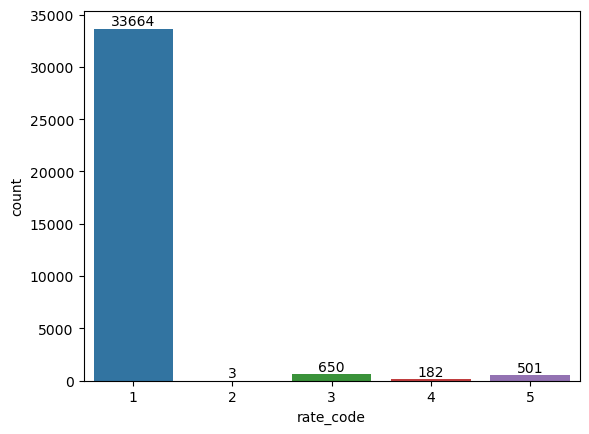

In [241]:
# plotting the rate code column to analyse the value distribution in it-

ax = sns.countplot(x='rate_code', data=taxi)
ax.bar_label(ax.containers[0])
plt.show()

Inference

The rate code are divided into 5 categories which are

1.Standard rate

2.JFK

3.Newark

4.Nassau or Westchester

5.Negotiated

-The rate code affects the  trip because, most customers use the standard rate code.

In [242]:
# the distinct value in payment type-

taxi['payment_type'].value_counts()

1    30899
2     3926
3      132
4       43
Name: payment_type, dtype: int64

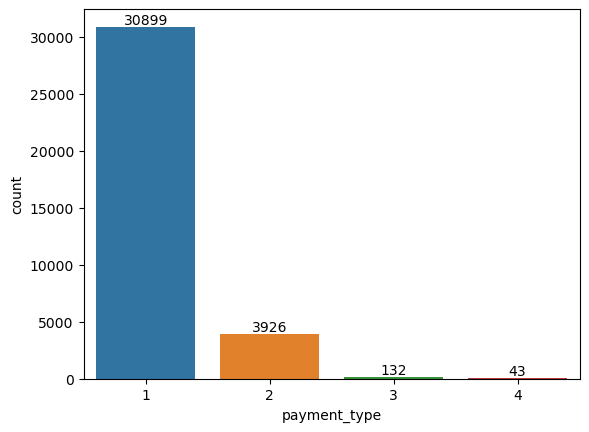

In [243]:
# plotting the payment type column to analyse the value distribution in it-

ax = sns.countplot(x='payment_type',data = taxi)
ax.bar_label(ax.containers[0])
plt.show()

   Inference

   The payment type is divided into 4 types

   1.credit card

   2.cash

   3.no charge

   4.dispute

   -most our customers use credit cards to pay for the fare and its less likely people who carry cash with them.

In [244]:
# converting date to yy/mm/dd format to get specific dates-

taxi['Date'] = pd.to_datetime(taxi[['year','month','day']], format='%Y%M%D')

In [245]:
# coverting seconds to minutes-

taxi['trip_duration'] = round(taxi['trip_duration']/60)

In [246]:
# dropping unnecessary columns-

taxi.drop(taxi.columns[[2,11,12,13,14,15]],axis=1,inplace=True)

# dropped column names = [store_and_fwd_flag, pickup_location_id, dropoff_location_id, year, month, day]

Inference

We are dropping these columns because they aren't the affecting factors for our target column.

In [247]:
# reindexing the columns-

taxi = taxi.reindex(columns = ['Date','trip_duration','trip_distance','rate_code','payment_type','fare_amount','tip_amount','tolls_amount','extra','mta_tax','imp_surcharge','total_amount','day_of_week','hour_of_day','calculated_total_amount'])

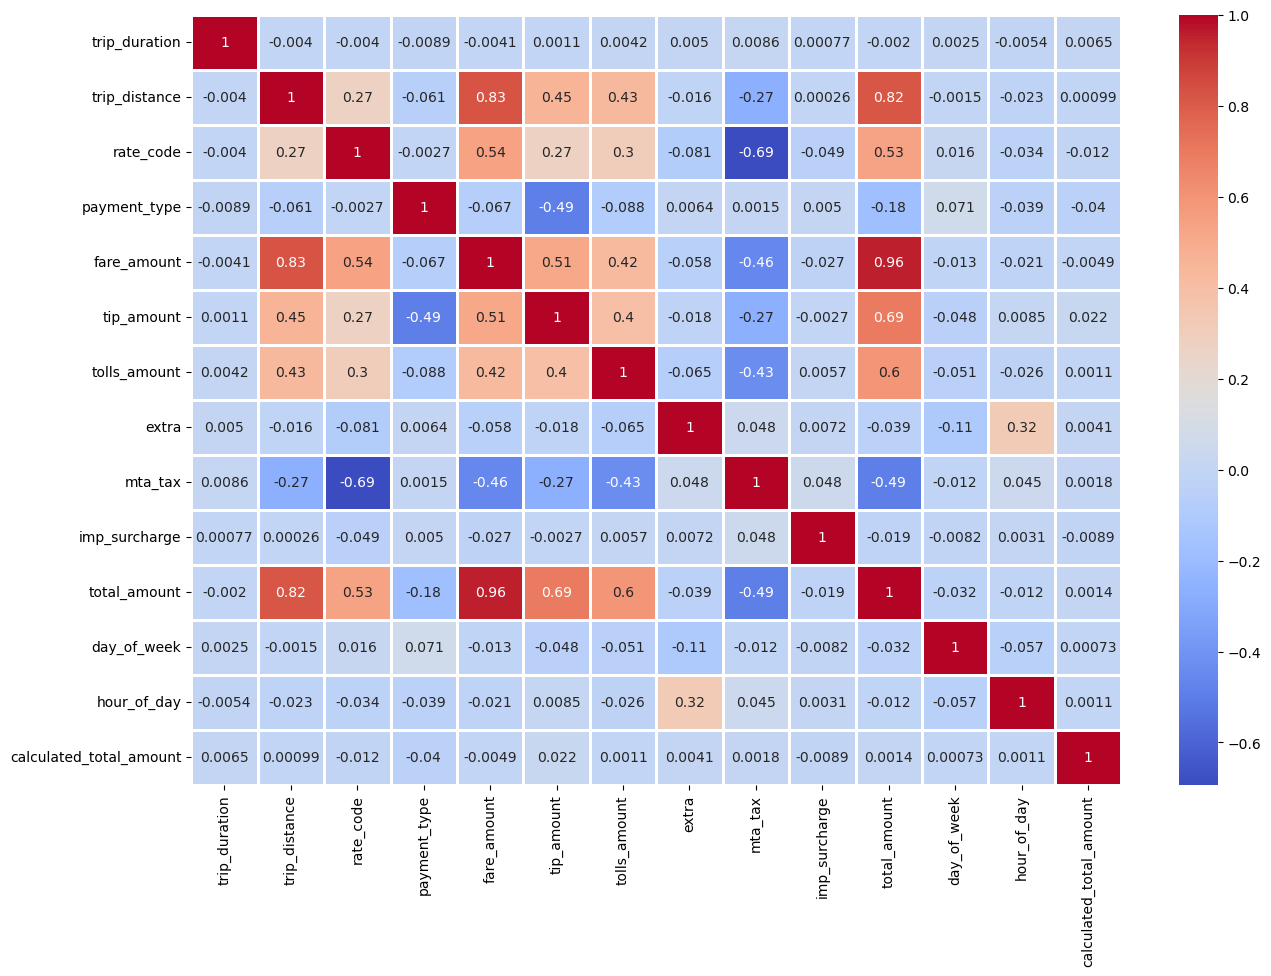

In [248]:
# plotting a heatmap to understand correlation between columns-

plt.figure(figsize = (15,10))
sns.heatmap(taxi.corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.show()

Inference-

from the heatmap we can observe that a number of columns correlate with each other.

there is correlation between trip distance,tip amount,fare amount,rate code,payment type and tolls amount.

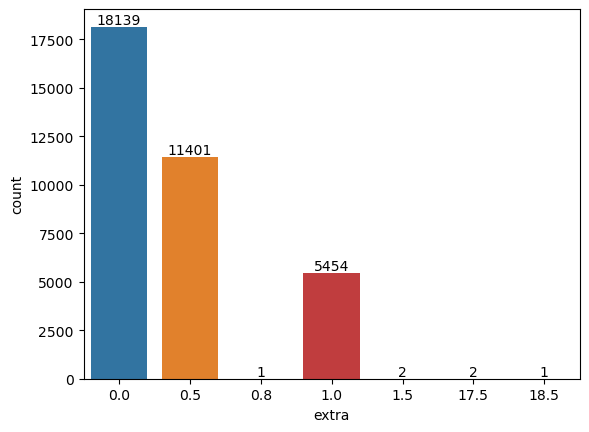

In [249]:
# plotting the extra column to analyse the value distribution in it-

ax = sns.countplot(x='extra',data=taxi)
ax.bar_label(ax.containers[0])
plt.show()

Inference

Most of the passengers dont pay extra but the rest of passengers pay 0.5 dollars to 1 dollars for every trip.

In [250]:
# the distinct values in mta tax column-

taxi['mta_tax'].value_counts()

0.5    34085
0.0      915
Name: mta_tax, dtype: int64

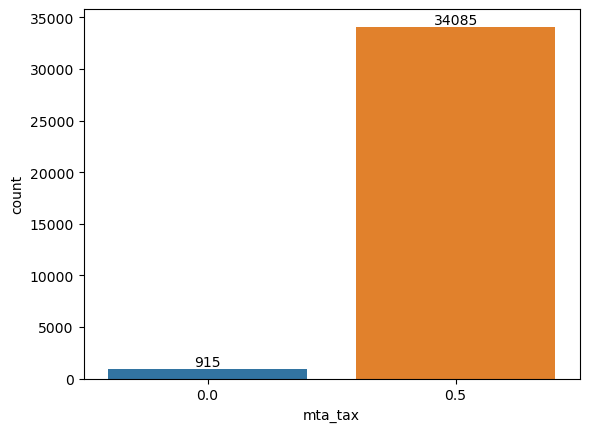

In [251]:
# plotting the mta tax column to analyse the value distribution in it-

ax = sns.countplot(x='mta_tax',data=taxi)
ax.bar_label(ax.containers[0])
plt.show()

Inference

majority of the passengerss pay mta tax 0.5 dollars, while rest of them don't.

In [252]:
# the distinct values in imp_surcharge  column-

taxi['imp_surcharge'].value_counts()

0.3    34993
0.0        7
Name: imp_surcharge, dtype: int64

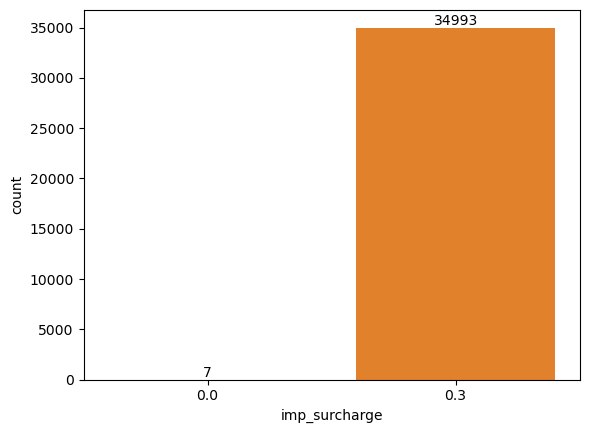

In [253]:
# plotting the imp surcharge column to analyse the value distribution in it-

ax = sns.countplot(x='imp_surcharge',data=taxi)
ax.bar_label(ax.containers[0])
plt.show()

Inference

most of the passengers pay imp surcharge 0.3 dollars, while rest of the don't.

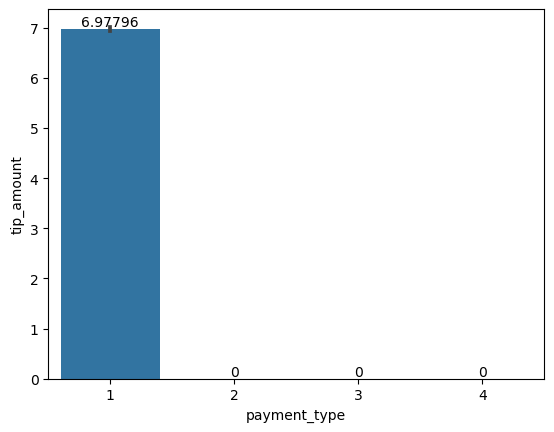

In [254]:
# plotting the payment type column  along with tip amount  to analyse the relation beyween them-

ax = sns.barplot(x='payment_type',y='tip_amount',data=taxi)
ax.bar_label(ax.containers[0])
plt.show()

inference 
 
 when customers use credit card they have to tip the driver for credit card transations and it makes an impact on our tip amount.

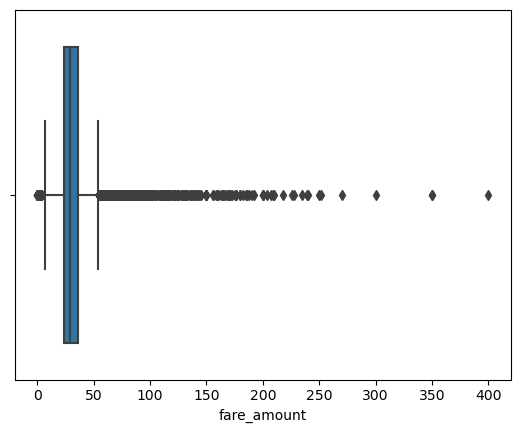

In [255]:
# plotting the graph-

sns.boxplot(taxi['fare_amount'],data=taxi)
plt.show()

Inference

The average fare amount is between 5 to 70 dollars, majority of the passengers pay in this range.

In [256]:
taxi[taxi['fare_amount'] > 90 ]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
225,2018-03-04,42.0,17.0,5,1,95.0,15.0,0.0,0.0,0.0,0.3,110.30,6,19,41.75
380,2018-04-17,24.0,31.0,5,1,150.0,7.0,8.0,0.0,0.5,0.3,165.31,1,13,28.50
385,2018-02-16,28.0,23.0,3,1,115.0,48.0,45.0,1.0,0.0,0.3,209.07,4,16,28.30
406,2018-05-24,41.0,26.0,3,1,98.0,22.0,12.0,0.0,0.0,0.3,132.95,3,15,70.27
584,2018-11-16,44.0,22.0,5,1,115.0,24.0,3.0,0.0,0.0,0.3,141.53,4,2,25.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33782,2018-03-18,108.0,32.0,3,2,104.0,0.0,16.0,0.0,0.0,0.3,120.55,6,7,36.30
34353,2018-06-05,53.0,33.0,4,1,150.0,15.0,3.0,0.0,0.5,0.3,168.94,1,8,42.95
34375,2018-11-17,17.0,41.0,5,1,145.0,32.0,14.0,0.0,0.5,0.3,191.76,5,0,27.36
34666,2018-12-22,26.0,33.0,4,2,98.0,0.0,22.0,0.0,0.5,0.3,120.32,5,9,54.07


In [257]:
taxi[taxi['fare_amount'] < 3]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
33,2018-01-08,22.0,0.0,1,1,2.0,1.0,0.0,0.0,0.5,0.3,4.25,0,10,29.10
34,2018-12-12,51.0,0.0,1,2,2.0,0.0,0.0,0.5,0.5,0.3,3.80,2,22,36.57
73,2018-12-01,54.0,0.0,1,2,2.0,0.0,0.0,0.0,0.5,0.3,3.30,5,10,51.35
309,2018-03-08,47.0,0.0,1,1,2.0,1.0,0.0,0.5,0.5,0.3,4.75,3,5,50.15
346,2018-10-19,18.0,0.0,1,2,2.0,0.0,0.0,1.0,0.5,0.3,4.30,4,16,52.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34015,2018-06-28,1.0,0.0,1,2,2.0,0.0,0.0,0.5,0.5,0.3,3.80,3,2,24.30
34192,2018-06-25,21.0,1.0,1,1,2.0,1.0,0.0,0.5,0.5,0.3,4.55,0,2,37.25
34371,2018-04-16,41.0,0.0,1,1,2.0,1.0,0.0,0.0,0.5,0.3,3.95,0,10,40.86
34566,2018-03-11,19.0,0.0,1,2,2.0,0.0,0.0,0.0,0.5,0.3,3.30,6,11,27.30


In [258]:
# droppin the outliers or anamolies-

taxi.drop(taxi[taxi.fare_amount > 90].index,inplace=True)
taxi.drop(taxi[taxi.fare_amount < 3].index,inplace=True)

Inference

Dropping the anomalies or irregularities so it becomes easier for machine learning models to understand the dataset.

we are dropping these rows becasue they dont have a standard rate code, majority of the rate codes are negotiated type so they are higher than standard passengers fare amount.

In [259]:
# the shape of data after dropping irregularities-

taxi.shape

(34539, 15)

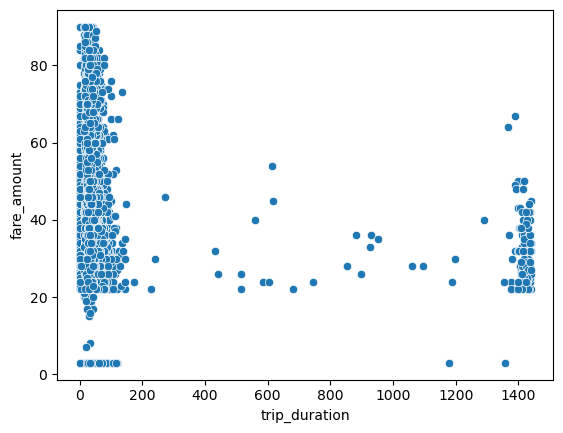

In [260]:
# plotting the graph

sns.scatterplot(taxi['trip_duration'],taxi['fare_amount'],data=taxi)
plt.show()

Inference

while some passengers pay more  amount to reach destination faster and the others who want to reach destination just in time, pay standard fare amount.

when fare amount is calculated plotted against trip duration , we can obeserve that majority of the passengers travell less than 200 minutes.

passengers travelling for more than 300 minutes pay the fare amount less than passengers travelling less than 200 minutes, these can be typing mistakes or irregularites(special case).

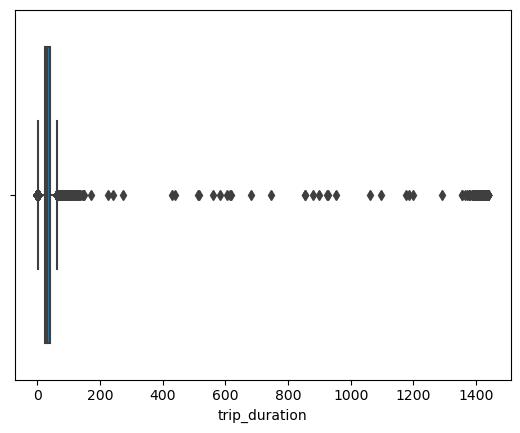

In [261]:
# plotting the graph-

sns.boxplot(taxi['trip_duration'],data=taxi)
plt.show()

Inference

from the figure we can observe that majority of passengers average travel time is less than 200 minutes.

In [262]:
taxi[taxi['trip_duration'] > 200]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
174,2018-01-07,1437.0,8.0,1,1,24.0,6.0,6.0,0.5,0.5,0.3,37.87,6,23,30.35
308,2018-05-24,1434.0,8.0,1,1,22.0,7.0,6.0,0.5,0.5,0.3,36.95,3,23,43.87
369,2018-04-15,1416.0,9.0,1,1,28.0,1.0,0.0,0.5,0.5,0.3,30.38,6,1,41.06
604,2018-07-27,1420.0,9.0,1,1,27.0,7.0,6.0,0.5,0.5,0.3,40.86,4,4,28.56
1021,2018-02-09,1429.0,10.0,1,1,35.0,10.0,6.0,0.0,0.5,0.3,51.95,4,8,43.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33909,2018-12-10,1424.0,8.0,1,1,24.0,8.0,6.0,0.5,0.5,0.3,38.82,0,0,52.58
34203,2018-10-11,1408.0,14.0,1,1,38.0,8.0,0.0,0.5,0.5,0.3,47.15,3,23,58.80
34333,2018-10-15,1409.0,10.0,1,1,29.0,5.0,6.0,0.5,0.5,0.3,41.47,0,4,57.95
34396,2018-09-04,1411.0,9.0,1,1,26.0,7.0,6.0,0.5,0.5,0.3,40.27,1,0,102.30


In [263]:
taxi[taxi['trip_duration'] < 1]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
493,2018-09-03,0.0,12.0,1,1,36.0,7.0,0.0,0.0,0.5,0.3,43.56,0,18,30.80
930,2018-08-17,0.0,5.0,1,1,24.0,5.0,0.0,0.0,0.5,0.3,29.76,4,11,61.18
1791,2018-12-09,0.0,16.0,1,1,43.0,9.0,0.0,0.0,0.5,0.3,52.55,6,19,6.20
1796,2018-06-07,0.0,10.0,1,1,40.0,8.0,0.0,0.0,0.5,0.3,48.36,3,10,44.80
1968,2018-06-19,0.0,13.0,1,1,44.0,0.0,0.0,0.0,0.5,0.3,44.30,1,8,35.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33983,2018-05-14,0.0,11.0,1,1,34.0,9.0,0.0,0.5,0.5,0.3,44.75,0,20,35.75
34260,2018-05-15,0.0,10.0,1,1,35.0,10.0,6.0,0.0,0.5,0.3,51.95,1,11,27.36
34305,2018-06-16,0.0,11.0,1,1,36.0,6.0,0.0,0.5,0.5,0.3,42.80,5,0,32.15
34582,2018-12-09,0.0,10.0,1,1,34.0,9.0,6.0,0.0,0.5,0.3,49.06,6,16,27.95


In [264]:
taxi.drop(taxi[taxi.trip_duration > 200].index,inplace=True)
taxi.drop(taxi[taxi.trip_duration < 1].index,inplace = True)

Inference

we are dropping these rows form the dataset because some passengers travelled from 200 minutes to 1400 minutes and paid fare amount less than 50 dollars, and some passengers travelled less than 1 minutes and paid more than 30 dollars, which is impossible.

These are anomalies or irregularites caused by typing mistakes or system error.

In [265]:
taxi.shape

(34200, 15)

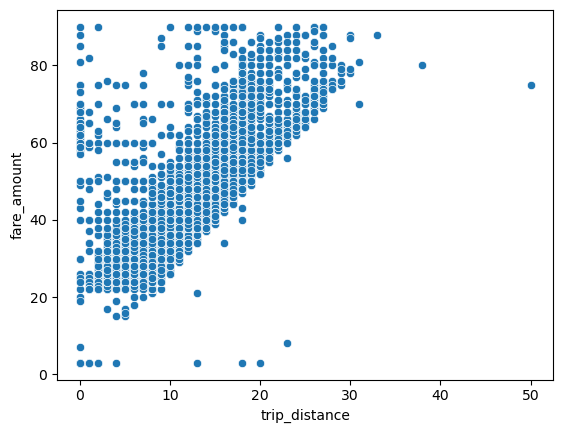

In [266]:
# plotting the graph-

sns.scatterplot(taxi['trip_distance'],taxi['fare_amount'],data=taxi)
plt.show()

Inference

from the figure we can observe that majority of the passengers travell less than 30 miles and the fare amount increases linearly.

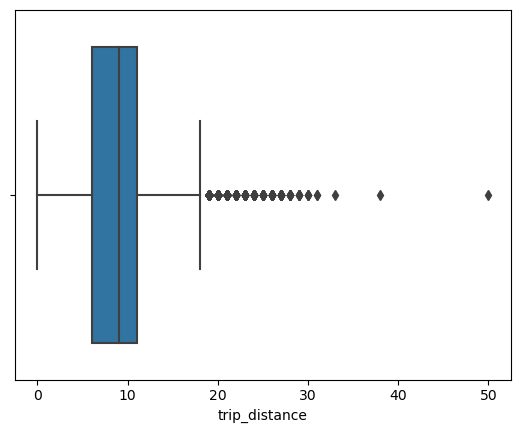

In [267]:
# plotting the graph-

sns.boxplot(taxi['trip_distance'])
plt.show()

Inference

from the figure we can observe that majority of the distance travelled by passengers is between 0 to 20 miles.

In [268]:
taxi[taxi.trip_distance  > 30]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
2768,2018-05-03,67.0,50.0,5,1,75.0,25.0,0.0,0.0,0.0,0.3,100.30,3,20,3.80
5902,2018-08-01,19.0,38.0,5,1,80.0,0.0,10.0,0.0,0.5,0.3,91.30,2,2,45.70
7391,2018-05-15,37.0,31.0,1,1,81.0,16.0,0.0,0.5,0.5,0.3,98.75,1,22,38.05
8053,2018-08-19,37.0,33.0,1,1,88.0,20.0,12.0,0.5,0.5,0.3,120.38,6,2,43.20
22673,2018-11-18,38.0,31.0,5,1,70.0,19.0,6.0,0.0,0.5,0.3,95.70,6,10,29.16


In [269]:
taxi[taxi.trip_distance  < 1]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
1,2018-02-25,40.0,0.0,1,1,3.0,1.0,0.0,0.0,0.5,0.3,4.55,6,10,37.40
27,2018-10-05,42.0,0.0,1,1,3.0,1.0,0.0,0.5,0.5,0.3,5.35,4,20,26.30
52,2018-12-22,23.0,0.0,1,2,3.0,0.0,0.0,0.0,0.5,0.3,3.80,5,12,40.87
92,2018-03-08,64.0,0.0,1,1,3.0,1.0,0.0,1.0,0.5,0.3,5.76,3,16,45.80
97,2018-11-07,25.0,0.0,1,1,3.0,1.0,0.0,0.5,0.5,0.3,4.94,2,21,38.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34902,2018-03-18,34.0,0.0,1,2,3.0,0.0,0.0,0.0,0.5,0.3,3.80,6,10,29.16
34910,2018-03-25,22.0,0.0,1,1,3.0,1.0,0.0,0.0,0.5,0.3,4.56,6,16,54.75
34911,2018-02-17,28.0,0.0,1,1,3.0,1.0,0.0,0.5,0.5,0.3,5.59,5,1,52.27
34927,2018-03-06,37.0,0.0,1,1,3.0,1.0,0.0,0.5,0.5,0.3,5.38,1,23,54.68


In [270]:
taxi.drop(taxi[taxi.trip_distance  > 30].index,inplace=True)
taxi.drop(taxi[taxi.trip_distance  < 1].index,inplace=True)

Inference
we are dropping the passengers data who have travelled more than 30 miles so we get majority of our data under a range of 30 and remove irregularities.

we are dropping the passengers data who travelled less than 1 mile because they have been charged abnormally which may cause analmolies in the dataset and machine learning algorithm.

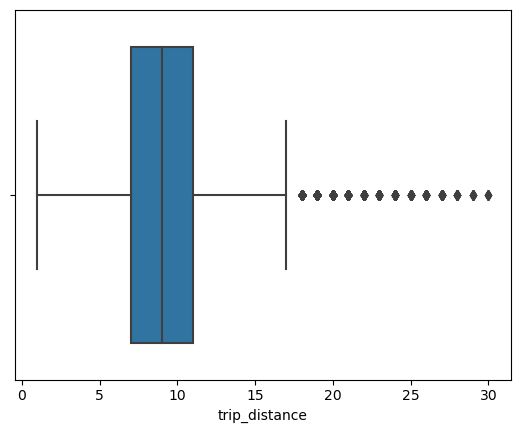

In [271]:
# plotting the graph-

sns.boxplot(taxi['trip_distance'])
plt.show()

Inference

After dropping the outliers, we can observe that majority of the passengers travel from  a range of 5 to 15 miles.

In [272]:
taxi.shape

(33265, 15)

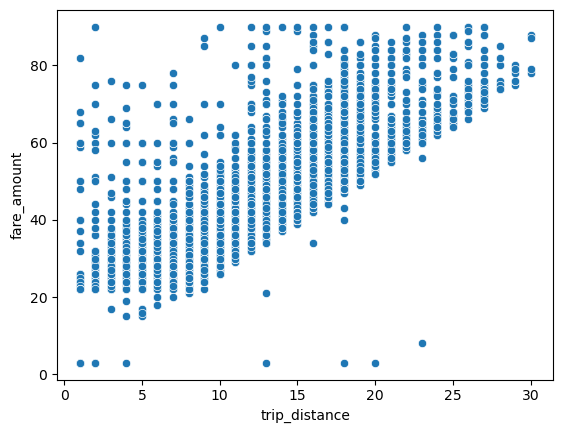

In [273]:
# plotting the graph-

sns.scatterplot(taxi['trip_distance'],taxi['fare_amount'],data=taxi)
plt.show()

Inference

After dropping the outliers we get a better understanding of dataset

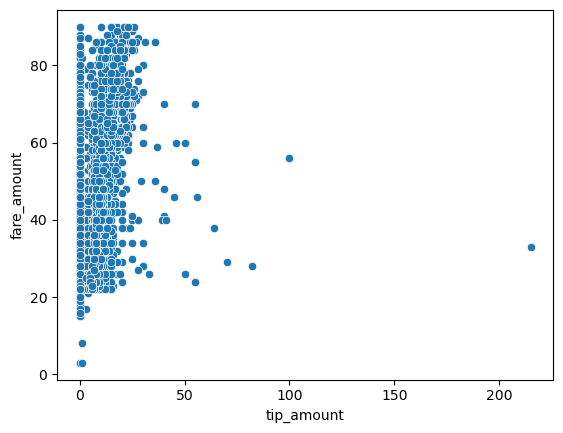

In [274]:
# plotting the graph-

sns.scatterplot(taxi['tip_amount'],taxi['fare_amount'],data=taxi)
plt.show()

Inference

from the figure we can observe that majority of the passengers tip amount between 0 to 50 dollars.

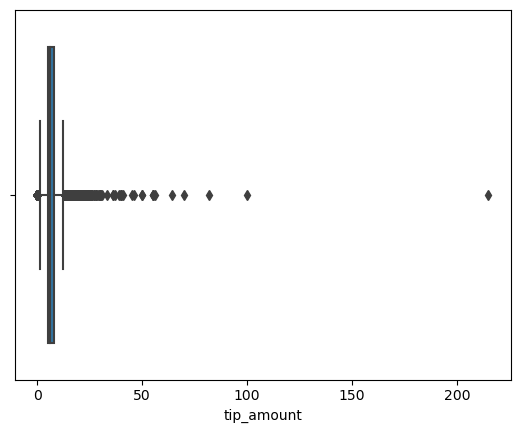

In [275]:
# plotting the graph-

sns.boxplot(taxi['tip_amount'])
plt.show()

Inference

The majority of the tip amount is between 0 and 50 dollars.

In [276]:
taxi[taxi['tip_amount'] > 30]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
6067,2018-11-18,23.0,19.0,4,1,86.0,36.0,0.0,0.0,0.5,0.3,122.68,6,17,52.56
6407,2018-05-05,22.0,10.0,1,1,40.0,40.0,12.0,0.0,0.5,0.3,93.80,5,13,46.87
6455,2018-02-08,33.0,11.0,1,1,41.0,40.0,6.0,0.0,0.5,0.3,87.56,3,10,4.32
10098,2018-05-06,31.0,8.0,1,1,28.0,82.0,0.0,0.5,0.5,0.3,112.30,6,2,48.82
11146,2018-12-21,51.0,7.0,1,1,56.0,100.0,0.0,0.0,0.5,0.3,156.80,4,10,58.86
14329,2018-10-16,33.0,6.0,3,1,40.0,39.0,21.0,0.5,0.0,0.3,100.00,1,20,116.80
15291,2018-10-16,1.0,14.0,1,1,38.0,64.0,0.0,0.0,0.5,0.3,102.60,1,6,28.80
16445,2018-02-17,25.0,22.0,5,1,60.0,50.0,6.0,0.0,0.5,0.3,116.56,5,1,31.07
16838,2018-05-03,39.0,17.0,1,1,48.0,40.0,6.0,0.5,0.5,0.3,94.56,3,1,39.07
16985,2018-10-26,26.0,13.0,1,1,40.0,41.0,0.0,0.0,0.5,0.3,82.30,4,15,30.96


In [277]:
taxi.drop(taxi[taxi.tip_amount  > 30].index,inplace=True)

Inference

removing the outliers form tip amount column because some peole tipped more than the fare amount which is  a mistake or typing error.

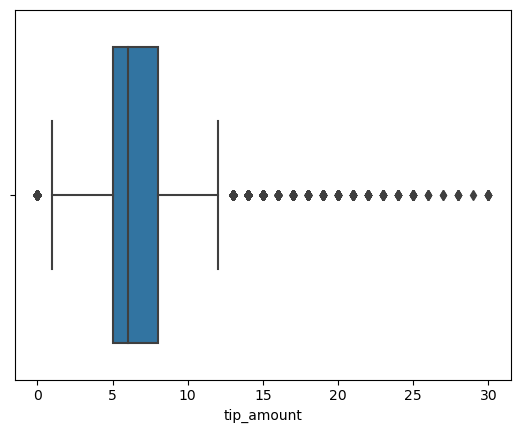

In [278]:
# plotting the graph-

sns.boxplot(taxi['tip_amount'])
plt.show()

Inference

after removing the anamolies or outliers,we can observe majority of the passengers tip between  3 to 10 dollars.

In [279]:
taxi.shape

(33241, 15)

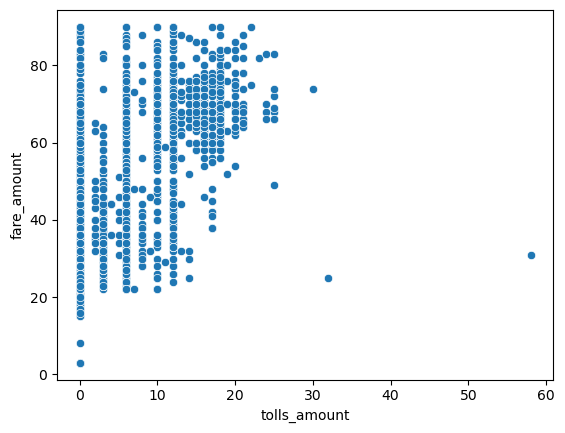

In [280]:
# plotting the graph-

sns.scatterplot(taxi['tolls_amount'],taxi['fare_amount'],data=taxi)
plt.show()

Inference 
 
from the figure, we can observe that majority of the people who paid tolls amount is under 25 dollars.

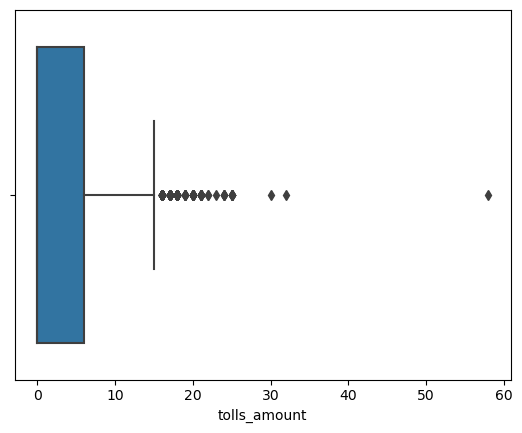

In [281]:
# plotting the graph-

sns.boxplot(taxi['tolls_amount'])
plt.show()

Inference

from the figure, we can observe that majority of the passengers who piad tolls amount is less than 15 dollars.

In [282]:
taxi[(taxi['tolls_amount'] > 20)]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
1877,2018-12-21,36.0,19.0,3,1,70.0,6.0,24.0,0.0,0.0,0.3,100.30,4,6,83.76
2960,2018-05-14,41.0,17.0,3,1,68.0,14.0,24.0,0.0,0.0,0.3,104.99,0,11,36.67
3188,2018-11-21,46.0,10.0,1,2,31.0,0.0,58.0,1.0,0.5,0.3,90.40,2,19,53.56
3430,2018-01-31,26.0,18.0,3,2,68.0,0.0,25.0,1.0,0.0,0.3,93.80,2,16,45.66
5748,2018-01-06,26.0,20.0,3,1,75.0,19.0,22.0,0.0,0.0,0.3,116.50,5,18,34.84
8528,2018-06-05,48.0,22.0,3,1,83.0,22.0,25.0,1.0,0.0,0.3,131.16,1,18,44.12
10216,2018-04-07,28.0,19.0,3,1,72.0,24.0,25.0,0.0,0.0,0.3,121.62,5,17,23.80
10631,2018-05-23,58.0,23.0,3,1,82.0,21.0,23.0,0.0,0.0,0.3,126.00,2,8,28.56
13218,2018-03-29,38.0,19.0,3,1,66.0,9.0,21.0,0.0,0.0,0.3,96.50,3,6,30.36
14554,2018-03-04,27.0,18.0,3,1,69.0,19.0,25.0,0.0,0.0,0.3,113.15,6,15,39.35


In [283]:
taxi.drop(taxi[taxi.tolls_amount  > 20].index,inplace=True)

Inference

dropping passengers data who paid toll amount greater than 20 dollars.

removing outliers so it doesn't cause errors in our machine learning models.

In [284]:
taxi.shape

(33207, 15)

In [285]:
taxi[(taxi.fare_amount > 50) & (taxi.rate_code  == 5)]

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
54,2018-06-05,16.0,3.0,5,1,66.0,16.0,12.0,0.0,0.5,0.3,95.16,1,7,40.56
478,2018-03-27,15.0,7.0,5,1,59.0,15.0,0.0,0.0,0.0,0.3,74.10,1,22,27.95
977,2018-04-16,41.0,16.0,5,1,80.0,20.0,18.0,0.0,0.5,0.3,118.87,0,16,33.80
1092,2018-02-25,33.0,20.0,5,1,85.0,20.0,12.0,0.0,0.0,0.3,117.36,6,11,47.56
1242,2018-10-28,27.0,15.0,5,1,89.0,25.0,12.0,0.0,0.0,0.3,127.25,6,12,27.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34182,2018-03-19,18.0,9.0,5,2,85.0,0.0,10.0,0.0,0.5,0.3,96.30,0,16,24.30
34526,2018-09-22,22.0,1.0,5,1,60.0,12.0,0.0,0.0,0.0,0.3,72.35,5,21,43.86
34602,2018-04-06,16.0,16.0,5,1,86.0,25.0,12.0,0.0,0.0,0.3,123.50,4,6,30.94
34954,2018-01-19,33.0,1.0,5,1,65.0,13.0,0.0,0.0,0.0,0.3,78.35,4,4,39.36


In [286]:
taxi.drop(taxi[(taxi.fare_amount > 20) & (taxi.rate_code  == 5)].index,inplace=True)

Inference

we are dropping passengers data where rate code used is 5 and fare amount is greater than 50 dollars, becasue the trip distnace is less than 15 miles and its an abnoramal amount to be charged to a passenger.

the rate code 5 is negotiated means, sometimes late at night when no taxi are available, a specific taxi and passengers come to an fare amount which is abnormal.

these fare amount can always change depending on the stiuation, so they are not calculable.

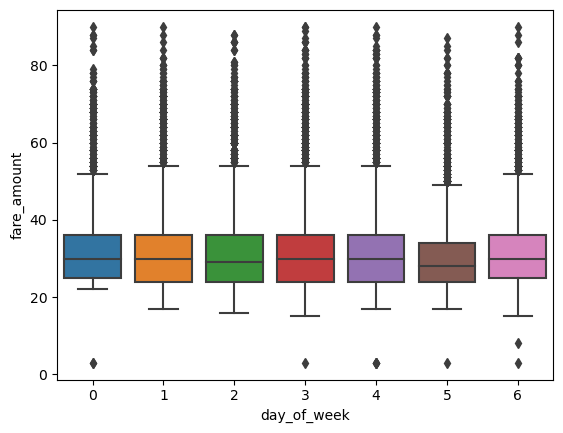

In [287]:
# plotting the graph-

sns.boxplot( x = 'day_of_week', y = 'fare_amount', data = taxi)
plt.show()

Inference

we can observe form the figure that on any day, majority of the passengers pay fare amount not greater than 50 dollars.

so any day of a week is less likely to affect the fare amount.

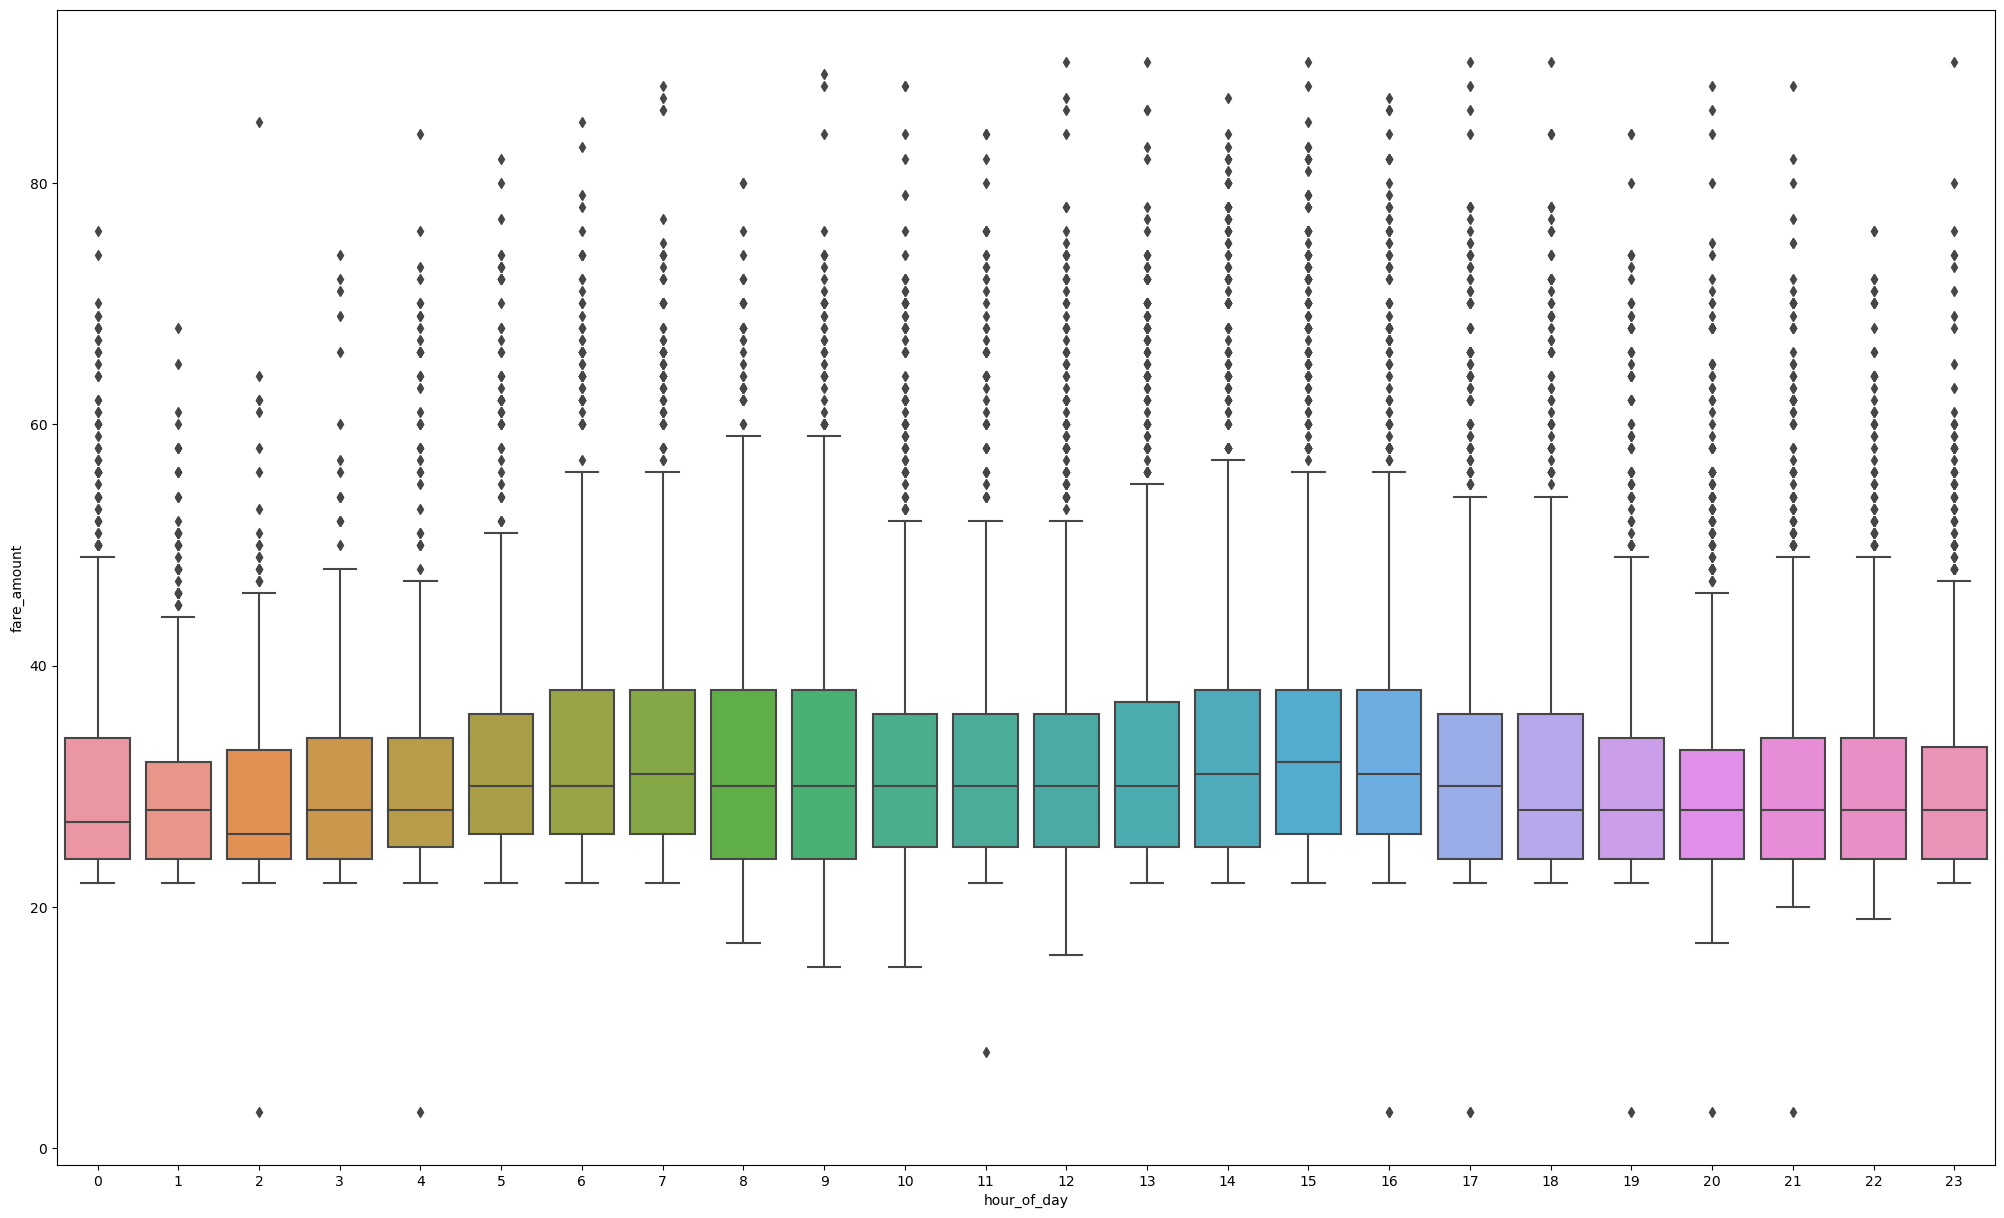

In [288]:
# plotting the graph-

plt.figure(figsize = (25,15))
sns.boxplot(x = 'hour_of_day',y ='fare_amount',data = taxi)
plt.show()

Inference

from the figure we can observe that any time of the day is less likely to affect our fare amount.

majority of the passengers pay fare amount not greater than 50 dollars.

 # conclusion
 
1) Fare amount is  dependent on distance travelled and other factors are less likely to affect fare amount. 

2) Fare amount is  calculated by the distance travelled, toll amount,rate code,payment type.

3) Rate code affect's the fare amount but only when passenger's choose other than standard rate.

4) Payment type also affect the fare amount because taxi drivers are charged for credit card transactions, customers pay the transaction charges in the form of tips.




# Using  Machine  Leraning models to determine the correct fare price

In [289]:
taxi

,Date,trip_duration,trip_distance,rate_code,payment_type,fare_amount,tip_amount,tolls_amount,extra,mta_tax,imp_surcharge,total_amount,day_of_week,hour_of_day,calculated_total_amount
0,2018-03-07,36.0,9.0,1,1,26.0,8.0,6.0,0.0,0.5,0.3,40.70,2,6,24.30
2,2018-01-29,21.0,10.0,1,1,42.0,10.0,6.0,0.0,0.5,0.3,57.67,0,8,30.36
3,2018-09-25,43.0,10.0,1,1,30.0,9.0,6.0,0.5,0.5,0.3,46.31,1,20,4.30
4,2018-08-20,26.0,6.0,1,1,22.0,5.0,0.0,0.5,0.5,0.3,27.36,0,21,23.80
5,2018-01-08,34.0,13.0,1,1,42.0,0.0,6.0,0.0,0.5,0.3,48.08,0,7,30.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,2018-06-26,31.0,5.0,1,1,22.0,6.0,0.0,1.0,0.5,0.3,30.38,1,16,56.00
34995,2018-05-23,50.0,22.0,1,1,60.0,10.0,6.0,0.5,0.5,0.3,76.56,2,23,29.76
34996,2018-04-04,24.0,9.0,1,1,30.0,7.0,6.0,0.0,0.5,0.3,43.14,2,9,29.15
34997,2018-03-07,41.0,7.0,1,1,23.0,6.0,0.0,0.0,0.5,0.3,29.75,2,8,42.67


In [290]:
# taking y as target column-

y = taxi.fare_amount
y.head()

0    26.0
2    42.0
3    30.0
4    22.0
5    42.0
Name: fare_amount, dtype: float64

In [291]:
# taking x as columns having direct or indirect relation wiht traget column-

x = taxi.iloc[:,2:8]
x.drop('fare_amount',inplace=True,axis=1)
x.head()    

,trip_distance,rate_code,payment_type,tip_amount,tolls_amount
0,9.0,1,1,8.0,6.0
2,10.0,1,1,10.0,6.0
3,10.0,1,1,9.0,6.0
4,6.0,1,1,5.0,0.0
5,13.0,1,1,0.0,6.0


In [292]:
# train test split-

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [293]:
# import standard scalar-

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

# Linear Regression

In [294]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

predict_price = model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error

ml = r2_score(y_test,predict_price)*100

print('Linear Regressor model  :' , ml)

Linear Regressor model  : 82.636704615455


In [295]:
ms_1 = mean_squared_error(y_test,predict_price)

print('mean sqaured error of model :' , ms_1)

mean sqaured error of model : 17.70209128989124


# K Neighbors Regressor

In [296]:
from sklearn.neighbors import KNeighborsRegressor

model_1 = KNeighborsRegressor()

model_1.fit(x_train,y_train)

predict_price_1 = model_1.predict(x_test)

ml_2 =r2_score(y_test,predict_price_1)*100

print('K Neighbors Regressor model  :' , ml_2)

K Neighbors Regressor model  : 86.90165781733106


In [297]:
ms_2 = mean_squared_error(y_test,predict_price_1)

print('mean sqaured error of model_1 :' , ms_2)

mean sqaured error of model_1 : 13.353919514047076


# Decision Tree Regressor

In [298]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor()

model_2.fit(x_train,y_train)

predict_price_2 = model_2.predict(x_test)

ml_3 = r2_score(y_test,predict_price_2)*100

print('Decision Tree Regressor model  :' , ml_3)

Decision Tree Regressor model  : 87.72352869081422


In [299]:
ms_3 = mean_squared_error(y_test,predict_price_2)

print('mean sqaured error of model_2 :' , ms_3)

mean sqaured error of model_2 : 12.51601214055094


# Random Forest Regressor

In [300]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()

model_3.fit(x_train,y_train)

predict_price_3 = model_3.predict(x_test)

ml_4 = r2_score(y_test,predict_price_3)*100

print('Random Forest Regressor model  :' , ml_4)

Random Forest Regressor model  : 88.41599542488838


In [301]:
ms_4 = mean_squared_error(y_test,predict_price_3)

print('mean sqaured error of model_3 :' , ms_4)

mean sqaured error of model_3 : 11.810033864520202


# Support Vector Machine 

In [302]:
from sklearn.svm import LinearSVR

model_4 = LinearSVR()

model_4.fit(x_train,y_train)

predict_4 = model_4.predict(x_test)

ml_5 = r2_score(y_test,predict_4)*100

print('Support Vector Machine model  :' , ml_5)

Support Vector Machine model  : 81.67104848301403


In [303]:
ms_5 = mean_squared_error(y_test,predict_4)

print('mean sqaured error of model_4 :' , ms_5)

mean sqaured error of model_4 : 18.686589487527666


The mean sqaure error is suppose to be 0 or the value nearest  to 0 generally indicates better performance of a regression model, as it means the model is making fewer errors compared to other machine learning models.

so mean sqaure error of model_3 (Random Forest Regressor) is the lowest at 11.8.

we consider Random Forest Regressor as best fit model.